# Домашнее задание

(прислать до 02:00 20.05.2019)

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Пусть $\varphi: \mathbb{R} \to \mathbb{R}$ возрастающая и выпуклая функция. Также $f: \mathbb{R}^n \to \mathbb{R}$ выпуклая, следовательно $g(x) = \varphi(f(x))$ также выпуклая функция. Также пусть $f$ и $g$ дважды диференцируемы.

- (0.4 pts) Как связаны между собой задачи минимизации $f$ и $g$?
- (0.6 pts) Сравните градиентный метод и метод Ньютона для решения задач минимизации $f$ и $g$. Как связаны направления, получаемые каждым из методов? Как связаны методы в случае использования наискорейшего спуска для выбора шага?

- Связь задач минимизации

$\nabla g(x) = \nabla \phi ( f (x)) = \phi'(y) \nabla f(x)$

$\nabla^2 g(x) = \nabla^2 \phi ( f (x)) = \phi''(y) \nabla f(x)\otimes (\nabla f)^T + \phi'(y) \nabla^2 f(x)$

$\phi$ - возрастающая $\Rightarrow \phi'(y) > 0$

$f$ и $g$ - дважды дифференциируемы и выпуклы, значит:$\nabla f(x^*) = 0 \Leftrightarrow x^*$ - минимум или максимум.

В минимуме(максимуме) $f$:

$\nabla g(x) = 0$ 

$\nabla^2 g(x) = \phi'(y) \nabla^2 f(x)$ - вторая производная $f$ имеет ту же знакоопределенность, что и $g$

Значит, минимумы(максимумы) функции $f$ являются минимумами(максимумами) функции $g$. 

Верно и обратное, т.к. из $\nabla g(x) = 0$, $\phi'(y) > 0$ следует, что $\nabla f(x) = 0$, и знакоопределенности вторых производных совпадают тоже.

Связь задач: $x^*$ - минимум(максимум) функции $f$ $\Leftrightarrow$ $x^*$ - минимум(максимум) функции $g$

- Сравнение методов

Направления в градиентном спуске:

$h_f = -\nabla f$

$h_g = -\nabla g = -\phi'\nabla f$

Направления в Ньютоновском методе:

$\tilde{h}_f = - (\nabla^2 f)^{-1} \nabla f = (\nabla^2 f)^{-1}h_f$

$\tilde{h}_g = - (\nabla^2 g)^{-1} \nabla g = -\Big(\phi''(y) \nabla f(x)\otimes (\nabla f)^T + \phi'(y) \nabla^2 f(x)\Big)^{-1}  \phi'(y) \nabla f(x) = (\nabla^2 g)^{-1} h_g = \Big(\phi''(y) h_f\nabla \otimes (h_f)^T - \phi'(y) \nabla h_f\Big)^{-1}  h_g $

Наискорейший спуск:

Для $f$: $\lambda_j = \text{argmin}_{\lambda} f(x_j - \lambda h_{f,j})$


## Задача 2

- (0.4 pts) Для задачи

$$
\log (e^x + e^{-x}) \to \min
$$

запустите метод Ньютона с постоянным шагом $\alpha = 1$ из точки $x_0 = 1$ и $x_0 = 1.1$. Что Вы заметили и почему?
- (0.4 pts) Что произойдёт, если использовать демпфированный метод Ньютона? Почему?
- (0.2 pts) Постройте графики сходимости для каждой постановки эксперимента и оцените время работы каждого метода.
При сравнении сходимости для разных условий стройте линии на одном графике и добавляйте легенду, иначе очень сложно понять, что происходит.
Также для сравнения сходимости достаточно указывать изменение нормы градиента, чтобы не загромождать рисунок.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def Newton1D(f, gradf, hessf, x0, epsilon, num_iter, line_search, 
                    disp=False, callback=None, **kwargs):
    x = x0.copy()
    iteration = 0
    opt_arg = {"f": f, "grad_f": gradf}
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:
        opt_arg["iteration"] = iteration
        gradient = gradf(x)
        hess = hessf(x)
        #h = np.linalg.solve(hess, -gradient)
        h = -gradient / hess # так, наверное, лучше не делать 
        alpha = line_search(x, h, **opt_arg)
        x = x + alpha * h
        if callback is not None:
            callback(x)
        iteration += 1
        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x))}
    return res

In [64]:
def linesearch_(x, *args, **kwargs):
    return 1

f = lambda x: np.log(np.exp(x) + np.exp(-x))
grad_f = lambda x: (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
hess_f = lambda x: 4/((np.exp(x) + np.exp(-x))**2)
x01 = np.ones(1)
x02 = x01 + 0.1

def callback_(x, hist_1, hist_2, hist_3):
    hist_1.append(x)
    hist_2.append(f(x))
    hist_3.append(grad_f(x))
    

x_history = []
f_history = []
grad_f_history = []

callback = lambda x: callback_(x, x_history, f_history, grad_f_history)

#x1 = Newton1D(f, grad_f, hess_f, x01, 1e-6, 100, linesearch_, disp = False, callback=callback)
x1 = Newton1D(f, grad_f, hess_f, x01, 1e-6, 100, linesearch_, disp = True, callback=callback)

x1_history = x_history
f1_history = f_history
grad_f1_history = grad_f_history

Current function val = [0.99286901]
Current gradient norm =  0.6714781841373958
Current function val = [0.7747108]
Current gradient norm =  0.38796507601847524
Current function val = [0.69426564]
Current gradient norm =  0.047269662404905495
Current function val = [0.69314718]
Current gradient norm =  7.060280352733244e-05
Current function val = [0.69314718]
Current gradient norm =  2.347011474057581e-13


In [9]:
x_history = []
f_history = []
grad_f_history = []

#x2 = Newton1D(f, grad_f, hess_f, x02, 1e-6, 10, linesearch_, disp = False, callback=callback)
x2 = Newton1D(f, grad_f, hess_f, x02, 1e-6, 10, linesearch_, disp = True, callback=callback)

x2_history = x_history
f2_history = f_history
grad_f2_history = grad_f_history

Current function val = [1.22808384]
Current gradient norm =  0.8105233058074695
Current function val = [1.31546406]
Current gradient norm =  0.8437734391666142
Current function val = [1.72830815]
Current gradient norm =  0.9348020302000571
Current function val = [5.71537096]
Current gradient norm =  0.9999782866629786
Current function val = [inf]
Current gradient norm =  nan
Current function val = [nan]
Current gradient norm =  nan
Current function val = [nan]
Current gradient norm =  nan
Current function val = [nan]
Current gradient norm =  nan
Current function val = [nan]
Current gradient norm =  nan
Current function val = [nan]
Current gradient norm =  nan


c:\dev\python372\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
c:\dev\python372\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
c:\dev\python372\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
c:\dev\python372\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


Как видно ниже, метод сходится достаточно быстро для $x=1$ и не сходится для $x=1.1$

Объяснение, почему не сходится:

In [10]:
x1_history

[array([-0.8134302]),
 array([0.40940232]),
 array([-0.04730492]),
 array([7.06028036e-05]),
 array([-2.34706609e-13])]

In [11]:
x2_history

[array([-1.12855259]),
 array([1.23413113]),
 array([-1.69516598]),
 array([5.7153601]),
 array([-23021.35648573]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan])]

Использован шаг $\alpha = \dfrac{1}{\sqrt{n+1}}$

Объяснение, почему сходится:

In [63]:
# демпфирование 
def sqrt_iter_stepsize(x, *args, **kwargs):
    return 1/np.sqrt(kwargs["iteration"]+1)

x_history = []
f_history = []
grad_f_history = []

x3 = Newton1D(f, grad_f, hess_f, x02, 1e-6, 20, sqrt_iter_stepsize, callback=callback)

x3_history = x_history
f3_history = f_history
grad_f3_history = grad_f_history

x3_history

[array([-1.12855259]),
 array([0.54211709]),
 array([0.16409503]),
 array([0.08056669]),
 array([0.04438005]),
 array([0.02623817]),
 array([0.01631652]),
 array([0.01054674]),
 array([0.0070309]),
 array([0.00480746]),
 array([0.00335793]),
 array([0.00238857]),
 array([0.0017261]),
 array([0.00126478]),
 array([0.00093821]),
 array([0.00070366]),
 array([0.000533]),
 array([0.00040737]),
 array([0.00031391]),
 array([0.00024372])]

In [33]:
#переделка функций из liboptpy.step_size.py

def armijo_stepsize(x, h, *args, **kwargs):
    alpha = kwargs["kwargs"]["alpha"]
    rho = kwargs["kwargs"]["rho"]
    beta = kwargs["kwargs"]["beta"]
    assert beta < 0.5, "Armijo rule is applicable for beta less than 0.5"
    assert rho < 1, "Decay factor has to be less than 1"
    f = kwargs["f"]
    grad_f = kwargs["grad_f"]
    current_grad = grad_f(x)
    current_f = f(x)
    x_next = x + alpha * h
    while True:
        if np.isnan(f(x_next)):
            alpha *= rho
        else:
            if f(x_next) >= current_f + beta * current_grad.dot(x_next - x):
                alpha *= rho
            else:
                break
        if alpha < 1e-16:
            break
        x_next = x + alpha * h
    return alpha
        
def wolfe_stepsize(x, h, *args, **kwargs):
    alpha = kwargs["kwargs"]["alpha"]
    rho = kwargs["kwargs"]["rho"]
    assert rho < 1, "Decay factor has to be less than 1"
    beta1 = kwargs["kwargs"]["beta1"]
    beta2 = kwargs["kwargs"]["beta2"]
    assert 0 < beta1 < beta2 < 1, "Wolfe rule is applicable for betas such that 0 < beta1 < beta2 < 1"
    grad_f = kwargs["grad_f"]
    f = kwargs["f"]
    current_grad = grad_f(x)
    current_f = f(x)
    while True: 
        if np.isnan(f(x + alpha * h)):
            alpha *= rho
        else:
            if f(x + alpha * h) > current_f + beta1 * alpha * current_grad.dot(h):
                alpha *= rho
            elif h.dot(grad_f(x + alpha * h)) < beta2 * h.dot(current_grad):
                alpha *= rho
            else:
                break
        if alpha < 1e-10:
            break
    return alpha
        
#def get_stepsize(self, h, x, num_iter, *args):        
#    alpha = self.par["init_alpha"]
#        elif self.rule == "Goldstein":
#            pass
 
    
def wolfe_strong_stepsize(x, h, *args, **kwargs):
    alpha = kwargs["kwargs"]["alpha"]
    rho = kwargs["kwargs"]["rho"]
    assert rho < 1, "Decay factor has to be less than 1"
    beta1 = kwargs["kwargs"]["beta1"]
    beta2 = kwargs["kwargs"]["beta2"]
    assert 0 < beta1 < beta2 < 1, "Wolfe rule is applicable for betas such that 0 < beta1 < beta2 < 1"
    grad_f = kwargs["grad_f"]
    f = kwargs["f"]
    current_grad = grad_f(x)
    current_f = f(x)
    while True: 
        if np.isnan(f(x + alpha * h)):
            alpha *= rho
        else:
            if f(x + alpha * h) > current_f + beta1 * alpha * current_grad.dot(h):
                alpha *= rho
            elif np.abs(h.dot(grad_f(x + alpha * h))) > beta2 * np.abs(h.dot(current_grad)):
                alpha *= rho
            else:
                break
        if alpha < 1e-10:
            break
    return alpha

In [47]:
params = {"alpha": 1, "beta": 0.1, "beta1": 0.1, "beta2": 0.9, "rho": 0.8}

x_history = []
f_history = []
grad_f_history = []

x3 = Newton1D(f, grad_f, hess_f, x02, 1e-6, 20, armijo_stepsize, callback=callback, kwargs=params)

x3_history = x_history
f3_history = f_history
grad_f3_history = grad_f_history

x3_history

[array([-0.68284207]),
 array([0.23295714]),
 array([-0.00852019]),
 array([4.12347239e-07])]

In [57]:
params = {"alpha": 1, "beta": 0.1, "beta1": 0.1, "beta2": 0.9, "rho": 0.8}

x_history = []
f_history = []
grad_f_history = []

x3 = Newton1D(f, grad_f, hess_f, x02, 1e-6, 20, wolfe_strong_stepsize, callback=callback, kwargs=params)

x3_history = x_history
f3_history = f_history
grad_f3_history = grad_f_history

x3_history

[array([-0.68284207]),
 array([0.23295714]),
 array([-0.00852019]),
 array([4.12347239e-07])]

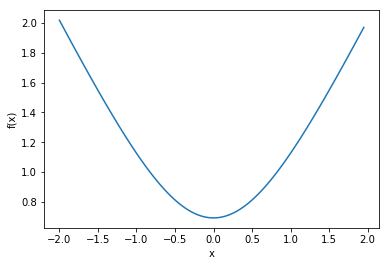

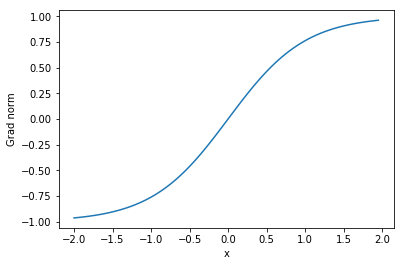

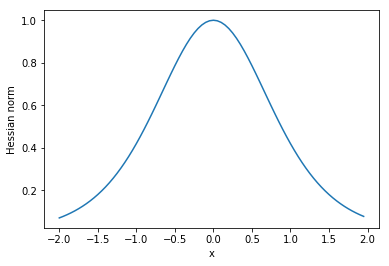

In [59]:
x=np.arange(-2, 2, 0.05)
plt.plot(x, f(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

plt.plot(x, grad_f(x))
plt.xlabel("x")
plt.ylabel("Grad norm")
plt.show()

plt.plot(x, hess_f(x))
plt.xlabel("x")
plt.ylabel("Hessian norm")
plt.show()

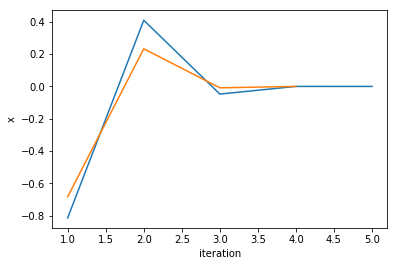

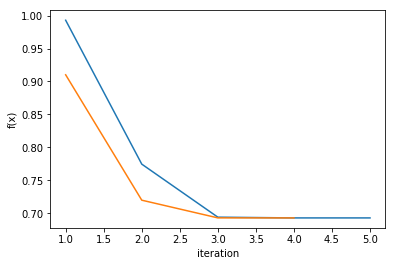

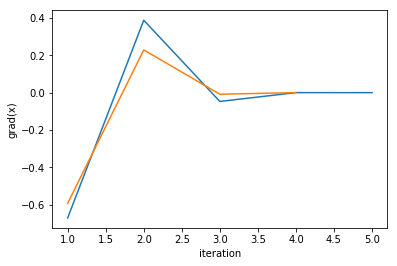

In [58]:
iter1 = np.arange(1, len(x1_history)+1, 1)
iter2 = np.arange(1, len(x2_history)+1, 1)
iter3 = np.arange(1, len(x3_history)+1, 1)

plt.plot(iter1, x1_history)
#plt.semilogy(iter2, x2_history)
plt.plot(iter3, x3_history)
plt.xlabel("iteration")
plt.ylabel("x")
plt.show()

plt.plot(iter1, f1_history)
plt.plot(iter3, f3_history)
plt.xlabel("iteration")
plt.ylabel("f(x)")
plt.show()

plt.plot(iter1, grad_f1_history)
plt.plot(iter3, grad_f3_history)
plt.xlabel("iteration")
plt.ylabel("grad(x)")
plt.show()

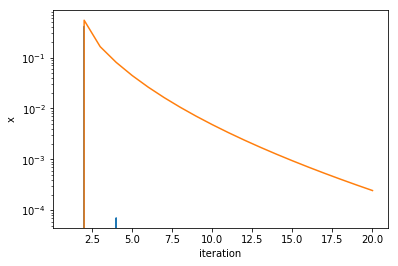

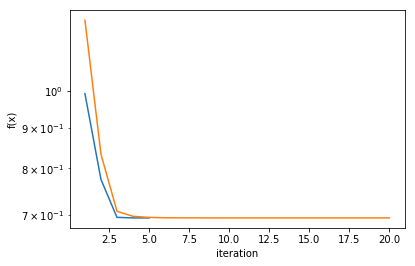

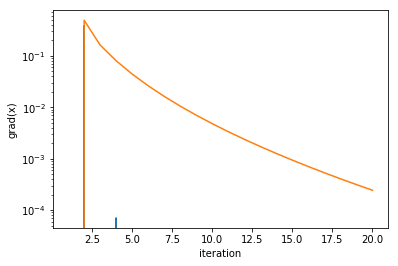

In [30]:
plt.semilogy(iter1, x1_history)
#plt.semilogy(iter2, x2_history)
plt.semilogy(iter3, x3_history)
plt.xlabel("iteration")
plt.ylabel("x")
plt.show()

plt.semilogy(iter1, f1_history)
plt.semilogy(iter3, f3_history)
plt.xlabel("iteration")
plt.ylabel("f(x)")
plt.show()

plt.semilogy(iter1, grad_f1_history)
plt.semilogy(iter3, grad_f3_history)
plt.xlabel("iteration")
plt.ylabel("grad(x)")
plt.show()

## Задача 3
- (0.2 pts) Покажите, что справедлива формула Шермана-Моррисона-Вудбери

$$
(A + UV)^{-1} = A^{-1} - A^{-1} U \left( I_k + V A^{-1} U \right)^{-1} V A^{-1},
$$
где $A \in \mathbb{R}^{n \times n}$, $U \in \mathbb{R}^{n \times k}$ и $V \in \mathbb{R}^{k \times n}$.

- (0.2 pts) Покажите, что преобразование DFP даёт положительно определённую оценку для гессиана $B_{k+1}$
- (0.4 pts) Выведите (а не покажите, что формула справедлива!) формулу для $H_k$ в методе DFP
- Реализуйте BFGS метод и сравните его сходимость с методом Ньютона 
    - (0.3) для задачи минимизации функции Розенброка из $x_0 = (-1.2, 1)$
    - (0.5) для задачи

    $$
    \min_x \log \left( \sum_{i=1}^m \exp(a_i^{\top}x + b_i)\right).
    $$

- (0.4) Попробуйте разные условия (достаточного убывания, существенного убывания, условие кривизны) для выбора шага $\alpha_k$ (сравните минимум два условия), всегда ли выполнялось условие $s^{\top}_k y_k > 0$?

- Формула Шермана (доказательство из википедии)

$\left(A + UCV \right) \left[ A^{-1} - A^{-1}U \left(C^{-1} + VA^{-1}U \right)^{-1} VA^{-1} \right] = $

$ = \left\{ I - U\left(C^{-1} + VA^{-1}U \right)^{-1}VA^{-1} \right\} + \left\{ UCVA^{-1} - UCVA^{-1}U \left(C^{-1} + VA^{-1}U \right)^{-1} VA^{-1} \right\} = $

$ = \left\{ I + UCVA^{-1} \right\} - \left\{ U\left(C^{-1} + VA^{-1}U \right)^{-1}VA^{-1} + UCVA^{-1}U \left(C^{-1} + VA^{-1}U \right)^{-1} VA^{-1} \right\} = $

$ = I + UCVA^{-1} - \left(U + UCVA^{-1}U\right) \left(C^{-1} + VA^{-1}U\right)^{-1}VA^{-1} = $

$ = I + UCVA^{-1} - UC \left(C^{-1} + VA^{-1}U\right) \left(C^{-1} + VA^{-1}U\right)^{-1}VA^{-1} = $

$ = I + UCVA^{-1} - UCVA^{-1} = $

$ = I $

В частном случае (котором нужно было доказать) $C = I_k$ 

- DFP дает положительно определённую оценку для гессиана $B_{k+1}$

$B_{k+1} = (I - \rho_k y_k s_k^T) B_k (I - \rho_k s_k y_k^T) + \rho_k y_k y_k^T$

где $\rho_k = \dfrac{1}{y_k^T s_k}$

Если $B_k$ - положительно определенная, то она задает скалярное произведение $(a,b) = a^T B_k b$ и норму $(a,a) = a^T B_k a = \Vert a \Vert_B^2 $

$x^T B_{k+1} x =  (x^T - \rho_k \langle x,y_k \rangle s_k^T) B_k (x - \rho_k s_k \langle x, y_k \rangle) + \rho_k \langle x, y_k \rangle^2 = \Vert x^T - \rho_k \langle x,y_k \rangle s_k^T \Vert_B^2 + \rho_k \langle x, y_k \rangle^2 $

$\Vert x^T - \rho_k \langle x,y_k \rangle s_k^T \Vert_B^2 > 0$, $\langle x, y_k \rangle^2 > 0$, $\dfrac{1}{\rho_k} = y_k^T s_k = s_k^T B s_k > 0$

Значит, $x^T B_{k+1} x \Rightarrow$ $B_{k+1}$ - положительно-определенная

- Вывод формулы для $H_k$ в DFP

Применим формулу Шермана, где 
$B_{k+1} = \left(A + UV \right) = (I - \rho_k y_k s_k^T) B_k (I - \rho_k s_k y_k^T) + \rho_k y_k y_k^T =$

$ = B_k - \rho_k y_k s_k^T B_k - B_k \rho_k s_k y_k^T + \rho_k^2 y_k s_k^T B_k s_k y_k^T + \rho_k y_k y_k^T = $

$A = (I - \rho_k y_k s_k^T) B_k (I - \rho_k s_k y_k^T) $, $U = \rho_k y_k$, $V = y_k^T$

$B_{k+1}^{-1} = H_{k+1} = H_k - \dfrac{H_k y_k y_k^T H_k}{y_k^T H_k y_k} + \dfrac{s_k s_k^T}{y_k^T s_k}$

In [74]:
def Newton(f, gradf, hessf, x0, epsilon, num_iter, line_search, 
                    disp=False, callback=None, **kwargs):
    x = x0.copy()
    iteration = 0
    opt_arg = {"f": f, "grad_f": gradf}
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:
        opt_arg["iteration"] = iteration
        gradient = gradf(x)
        hess = hessf(x)
        h = np.linalg.solve(hess, -gradient)
        #h = -gradient / hess # так, наверное, лучше не делать 
        alpha = line_search(x, h, **opt_arg)
        x = x + alpha * h
        if callback is not None:
            callback(x)
        iteration += 1
        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x))}
    return res

- BFGS метод и сравнение с Ньютоновским для минимизации функции Розенброка

In [101]:
f = lambda x: (1-x[0])**2 + 100 * (x[1] - x[0]**2)**2
grad_f = lambda x: np.array([2*(x[0]-1) + 400 * (x[0]**2 - x[1]) * x[0], 200 * (x[1]-x[0]**2)])
hess_f = lambda x: np.array([[2 - 400 * x[1] + 1200 * x[0]**2,-400 * x[0]],[-400 * x[0],200]])
x0 = np.array([-1.2, 1])

In [109]:
params = {"alpha": 1, "beta": 0.1, "beta1": 0.1, "beta2": 0.9, "rho": 0.8}

x_history = []
f_history = []
grad_f_history = []

x3 = Newton(f, grad_f, hess_f, x0, 1e-6, 20, linesearch_, callback=callback, kwargs=params)

x3_history = x_history
f3_history = f_history
grad_f3_history = grad_f_history

x3_history

[array([-1.1752809 ,  1.38067416]),
 array([ 0.76311487, -3.17503385]),
 array([0.76342968, 0.58282478]),
 array([0.99999531, 0.94402732]),
 array([0.9999957 , 0.99999139]),
 array([1., 1.])]

- BFGS метод и сравнение с Ньютоновским для задачи...

In [112]:
a= np.array([[1,2,1], [4,5,6]])

b = np.array([10,10])

x = np.array([0,1,2])

x0 =  np.array([0,1,2])

#print(sum_exp(x,a,b))

#print(np.exp(a[0].T @ x + b[0]))
#print(np.exp(a[1].T @ x + b[1]))

#print(f(x,a,b))

#np.log(178482300)

print(hess_f(x,a,b))

#print(sum_exp(x, a, b))

#print(a[0].dot(np.transpose(a[0])))

#print(np.dot(a[0].reshape(a.shape[1],1) , a[0].reshape(1,a.shape[1])))

[[2.03428727e-05 2.03428727e-05 3.39047878e-05]
 [2.03428727e-05 2.03428727e-05 3.39047878e-05]
 [3.39047878e-05 3.39047878e-05 5.65079797e-05]]


In [113]:
#define a, b, x0

def exp_arg(x, a, b):
    return np.exp(a.T @ x + b)
    
def sum_exp(x, a=a, b=b):
    ret = 0
    for i in range(a.shape[0]):
        ret = ret + exp_arg(x,a[i],b[i])
    return ret

def f(x, a=a, b=b):
    x = np.array(x)
    x = x.reshape((x.size, 1))
    return np.log(sum_exp(x,a,b))

def grad_f(x, a=a, b=b):
    x = np.array(x)
    x = x.reshape((x.size, 1))
    ret = np.zeros(x.size)
    for i in range(a.shape[0]):
        ret = ret + (exp_arg(x,a[i],b[i]) * a[i])
    return ret / sum_exp(x,a,b)

def hess_f(x, a=a, b=b):
    x = np.array(x)
    x = x.reshape((x.size, 1))
    ret = np.zeros((x.size, x.size))
    for i in range(a.shape[0]):
        ret = ret + exp_arg(x,a[i],b[i]) * np.dot(a[i].reshape(a.shape[1],1) , a[i].reshape(1,a.shape[1]))
    grad_tmp = grad_f(x,a,b)
    return ret / sum_exp(x,a,b) - np.dot(grad_tmp.reshape(a.shape[1],1) , grad_tmp.reshape(1,a.shape[1]))
        

In [114]:
params = {"alpha": 1, "beta": 0.1, "beta1": 0.1, "beta2": 0.9, "rho": 0.8}

x_history = []
f_history = []
grad_f_history = []

x3 = Newton(f, grad_f, hess_f, x0, 1e-6, 20, linesearch_, callback=callback, kwargs=params)

x3_history = x_history
f3_history = f_history
grad_f3_history = grad_f_history

x3_history

c:\dev\python372\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
c:\dev\python372\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
c:\dev\python372\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


[array([-3.75299731e+14, -9.38249324e+13,  2.81474798e+14]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan])]

$\min_x \log \left( \sum_{i=1}^m \exp(a_i^{\top}x + b_i)\right)$

- Разные условия

In [56]:
def qwe():
    print("1")
    return

def jcu(tt, *args, **kwargs):
    ttt =tt
    ttt()
    for key in args:
        print(key)
    for key in kwargs:
        print(key)
    return

a=2
b =5
c = {"a": 2, "b": 5}
jcu(qwe,a,b, kwargs=c)

1
2
5
kwargs


## Задача 4 (1 pts)

Предложите свой квазиньютоновский метод, реализуйте его и сравните скорость его сходимости (по времени и по итерациям) с методом Ньютона и с методом BFGS, который Вы реализовали в задаче 3. Для сравнения используйте задачу 

$$
    \min_x \log \left( \sum_{i=1}^m \exp(a_i^{\top}x + b_i)\right).
$$

Обоснуйте (хотя бы в общих чертах), почему Ваш метод будет работать. 
Строгого доказательства я не требую, но мотивацию, которой Вы руководствовались, пожалуйста, приведите. 

In [ ]:
# Место для Вашего решения